<a href="https://colab.research.google.com/github/Tanjul5/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

First of all import all libraries

In [84]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
#Let's Mount the Drive and analyse the data..

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
Hotel_book_df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [88]:
Hotel_book_df.describe

<bound method NDFrame.describe of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...    

In [89]:
#checking top 10 rows
Hotel_book_df.head

<bound method NDFrame.head of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...        

In [90]:
#checking last 10 rows 
Hotel_book_df.tail

<bound method NDFrame.tail of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...        

In [91]:
#check columns name
Hotel_book_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [92]:
Hotel_book_df.shape

(119390, 32)

In [93]:
Hotel_book_df.fillna(Hotel_book_df.mean())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,189.266735,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.000000,189.266735,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.000000,189.266735,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.000000,189.266735,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.000000,189.266735,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [94]:
#Replacing NUll value with zero for convinience

Hotel_book_df.fillna(0, inplace=True)

In [95]:
#check duplicate rows
duplicate_rows_df = Hotel_book_df[Hotel_book_df.duplicated()].shape

print(f"the no. of duplicate rows :" , duplicate_rows_df)

the no. of duplicate rows : (31994, 32)


In [96]:
#drop duplicate values
df=Hotel_book_df.drop_duplicates()
df.shape

(87396, 32)

**some observations**

27.4 % of the people have cancelled their booking as per the dataset.

Avg. lead time is 80 days.

Only 4% of the guests are repeated.

Each booking has on an average 1.8 adults and 0.13 children

# **what is the count of each type of Hotels ?**

In [97]:
hotel_list = Hotel_book_df['hotel'].value_counts()
hotel_list
hotel_count = Hotel_book_df['hotel'].value_counts().index
hotel_count

Index(['City Hotel', 'Resort Hotel'], dtype='object')

The dataset describes two types of hotels, City and Resort hotel

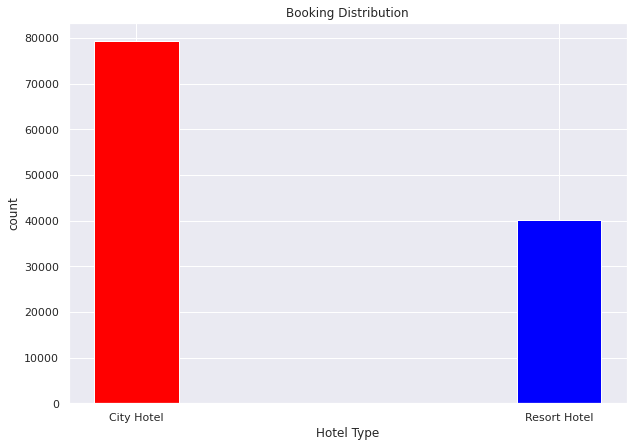

In [98]:
# creating the bar graph
plt.figure(figsize = (10,7))
plt.bar(hotel_count, hotel_list, color =['red','blue'], width = 0.2)
plt.xlabel("Hotel Type")
plt.ylabel("count")
plt.title('Booking Distribution')
plt.show()

the maximum number of customers prefer to book city hotel than the resort hotel.

Text(0.5, 1.0, 'Booking per year')

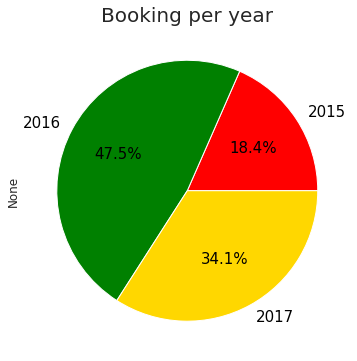

In [99]:
bookper_year=Hotel_book_df.groupby('arrival_date_year').size().plot(kind='pie', fontsize=15, autopct='%.1f%%',  figsize=(6, 6), colors = [ 'red', 'green', 'gold'],textprops={'color':"black"}) 
plt.title('Booking per year',fontsize=20)


In [100]:
top_10_countries = Hotel_book_df[Hotel_book_df['is_canceled']==0]['country'].value_counts()[:10]
top_10_countries

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
IRL     2543
ITA     2433
BEL     1868
NLD     1717
USA     1596
Name: country, dtype: int64

Text(0, 0.5, 'Count')

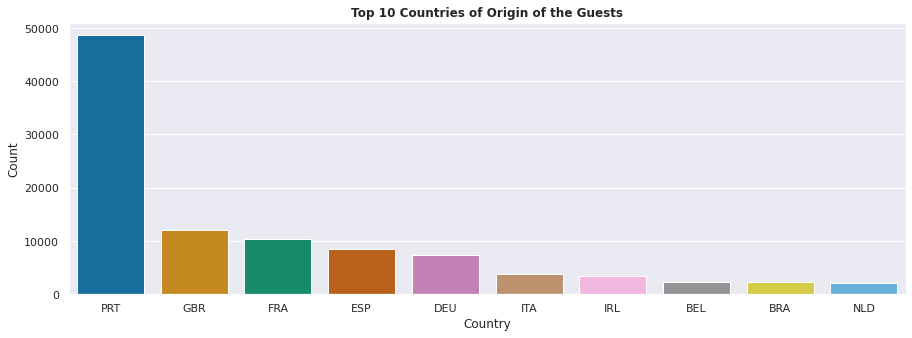

In [101]:
sns.countplot(x='country', data=Hotel_book_df,order=pd.value_counts(Hotel_book_df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')

Text(0.5, 0, 'Arrival Month')

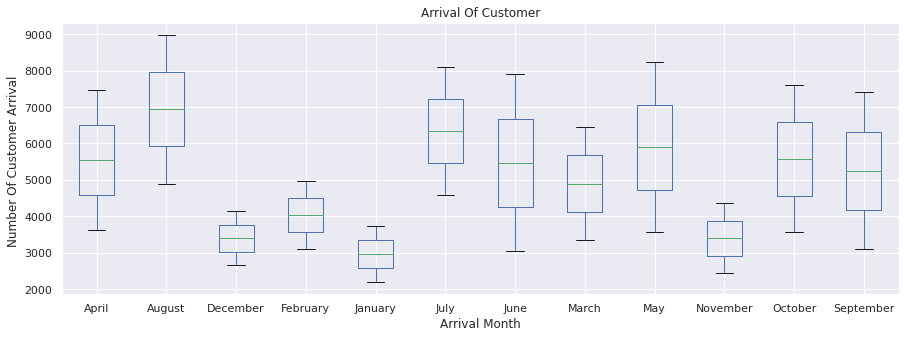

In [102]:
Hotel_book_df.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].size().unstack().plot(kind="box")
plt.title('Arrival Of Customer')
plt.ylabel('Number Of Customer Arrival ')
plt.xlabel('Arrival Month')

Text(0, 0.5, 'Count')

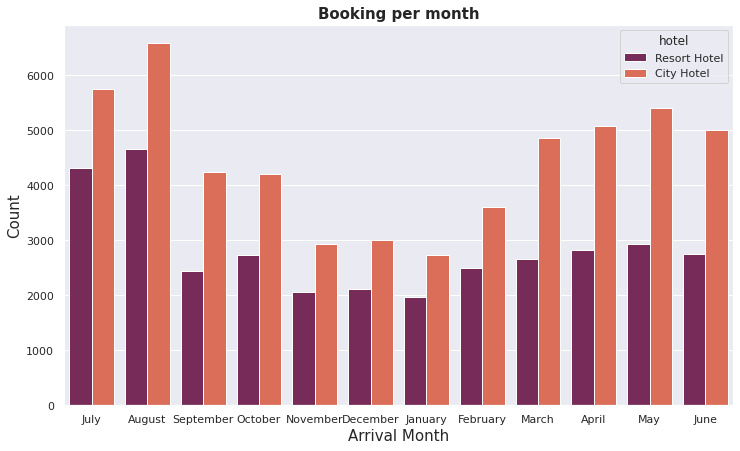

In [103]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x= 'arrival_date_month',hue = 'hotel',data = df,palette= 'rocket')
plt.title ('Booking per month',weight = 'bold', size = 15)
plt.xlabel("Arrival Month",size = 15)
plt.ylabel('Count',size = 15)

Text(0, 0.5, 'No. of Bookings(%)')

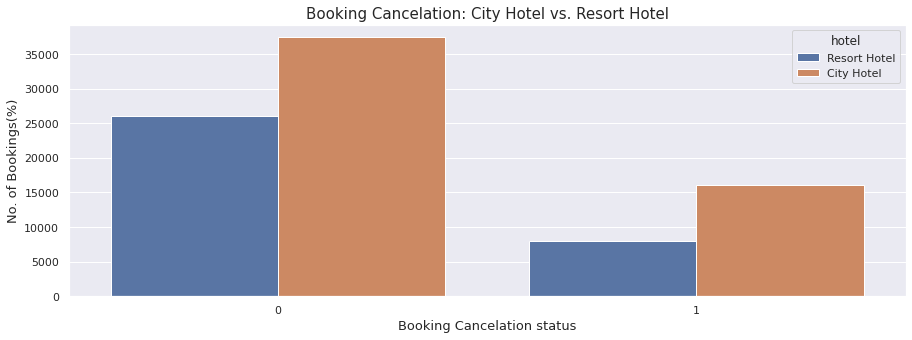

In [104]:
plt.rcParams['figure.figsize']= (15,5)
sns.countplot(data = df, x = 'is_canceled', hue = 'hotel')
plt.title('Booking Cancelation: City Hotel vs. Resort Hotel',fontsize=15)
plt.xlabel('Booking Cancelation status', fontsize=13)
plt.ylabel('No. of Bookings(%)', fontsize=13)

## Relation between cancellation and repetaed guest¶

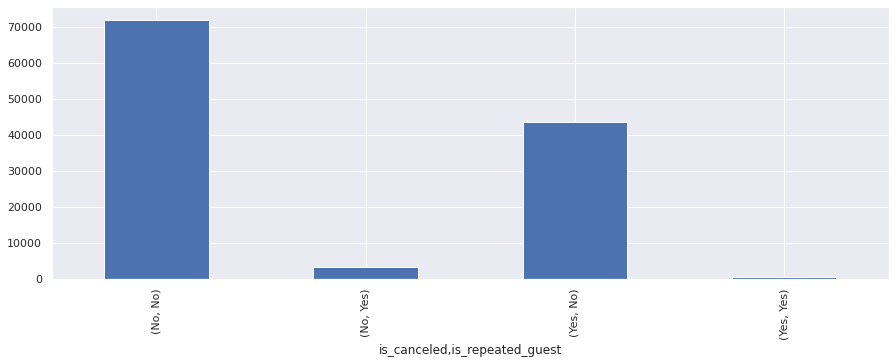

In [105]:
Hotel_book_df["is_canceled"].replace([1,0],['Yes','No'],inplace=True)
Hotel_book_df["is_repeated_guest"].replace([1,0],['Yes','No'], inplace=True)
df=Hotel_book_df.groupby(['is_canceled','is_repeated_guest']).size()
df.plot(kind='bar')

The number of repeated guests are low, but the repeated guests have a very low rate of cancelations.
Coming up with a stragies to change a new customer into retuning customer is one of the key ways to reduce the cancellation rate.

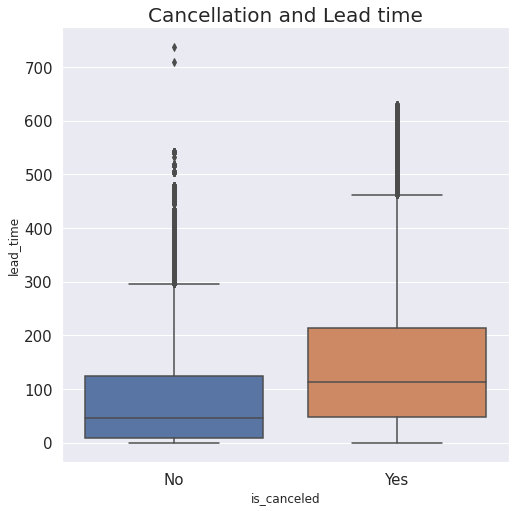

In [106]:
# depicting groups of Cancellation through their quartiles using boxplot
# 0 - not cancelled, 1- is cancelled
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Cancellation and Lead time", fontsize=20)
sns.boxplot(x='is_canceled',y='lead_time',data=Hotel_book_df)

We can notice that the cancellation rate was lower when the customers were allowed for changes¶
Being liberal on allowing customers to change thier bookings can help in reducing the cancellation rate. However it is better to limit is to 5

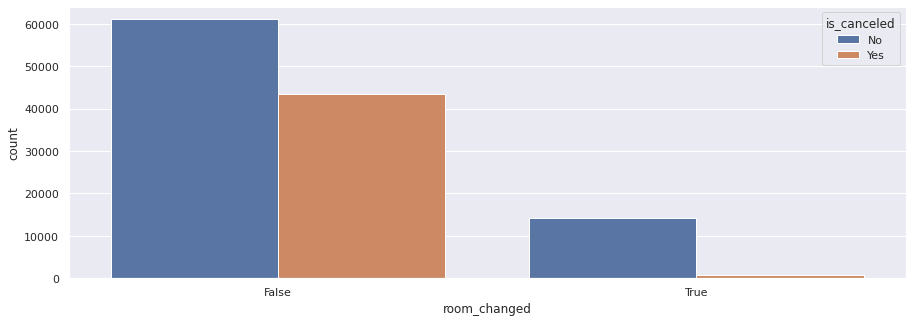

In [107]:
Hotel_book_df['room_changed']=Hotel_book_df['reserved_room_type']!=Hotel_book_df['assigned_room_type']
Hotel_book_df['room_changed']
sns.countplot(x=Hotel_book_df['room_changed'],hue=Hotel_book_df['is_canceled'])


Customers who have changed the room type are much less likely to cancel their reservations than those who have not changed. The guessed reason may be:
The customer is not satisfied with the room type, but in order to ensure normal check-in, they choose to change the room type without canceling the reservation, so the probability of cancellation is low

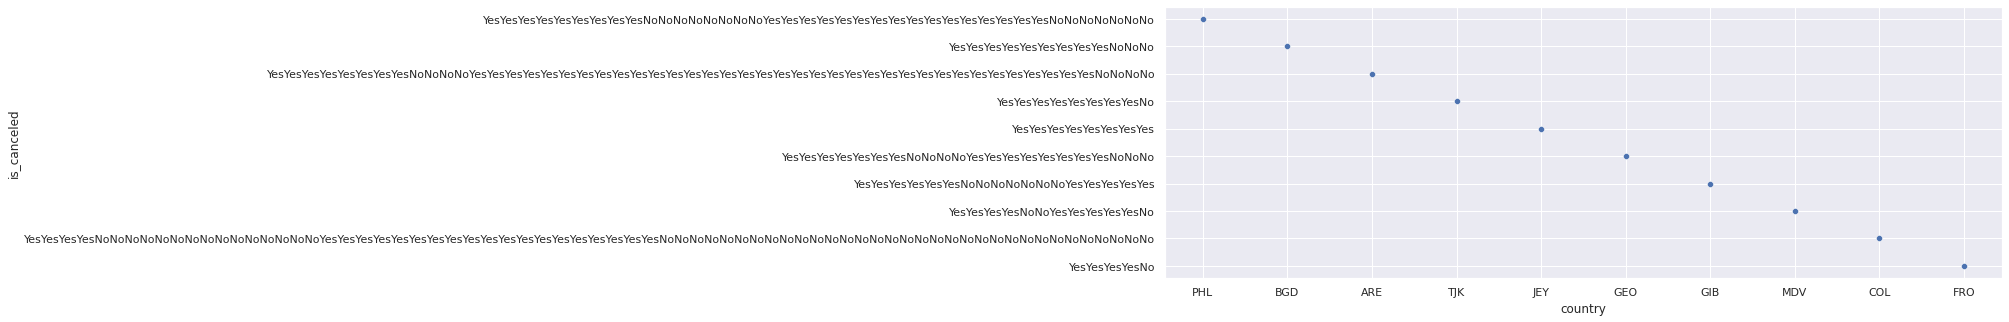

In [108]:
cancellation_data_df =Hotel_book_df.groupby('country')['is_canceled'].sum().sort_values(ascending = False)
sns.scatterplot(data = cancellation_data_df.head(10))


Text(0, 0.5, 'Counts')

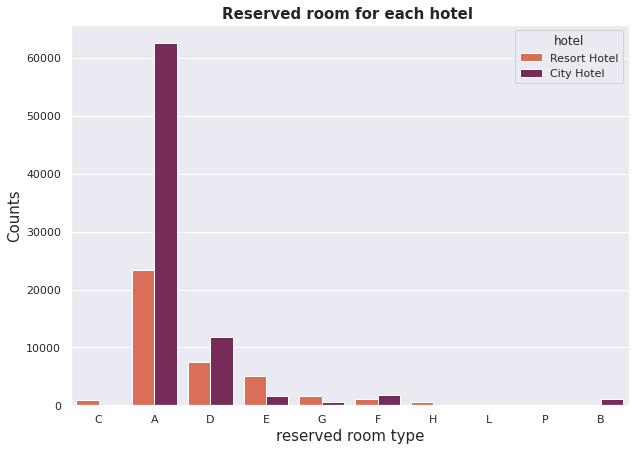

In [109]:
fig, ax = plt.subplots(figsize = (10,7))    
sns.countplot(x ='reserved_room_type', data = Hotel_book_df, hue = "hotel", palette = 'rocket_r')
plt.title('Reserved room for each hotel ', weight='bold',size = 15)
plt.xlabel('reserved room type',size = 15)
plt.ylabel('Counts',size = 15)

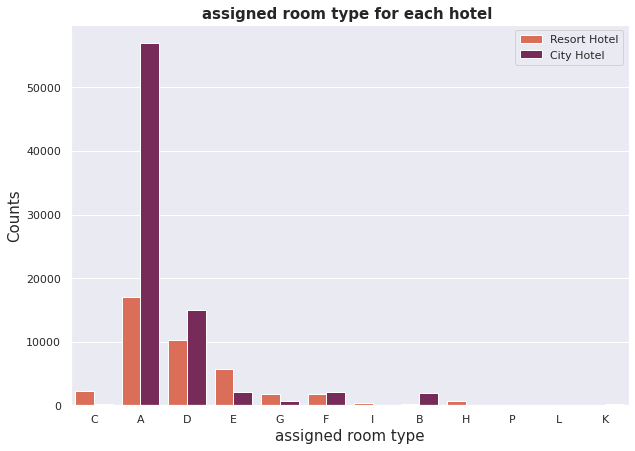

In [110]:
fig, ax = plt.subplots(figsize = (10,7))    
sns.countplot(x ='assigned_room_type', data = Hotel_book_df, hue = "hotel", palette = 'rocket_r')
plt.title('assigned room type for each hotel ', weight='bold',size = 15)
plt.xlabel('assigned room type',size = 15)
plt.ylabel('Counts',size = 15)
plt.legend(loc='upper right')

Text(0, 0.5, 'Count')

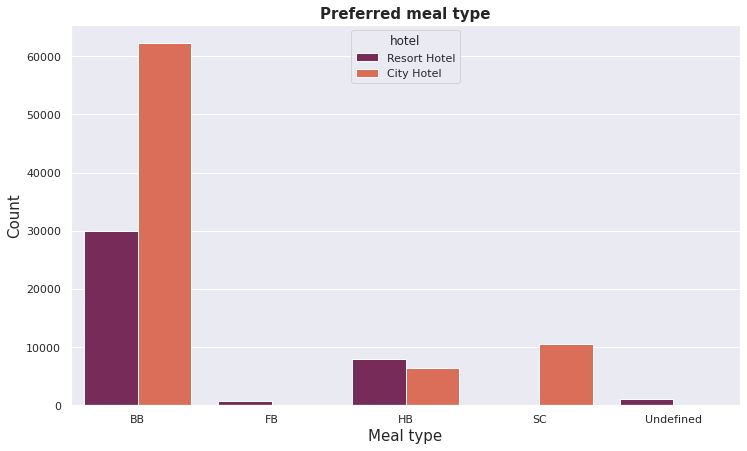

In [111]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x= 'meal',hue = 'hotel',data = Hotel_book_df,palette= 'rocket')
plt.title ('Preferred meal type',weight = 'bold', size = 15)
plt.xlabel("Meal type",size = 15)
plt.ylabel('Count',size = 15)

Conclusion - Most of the guests prefer Bed and Breakfast(BB) meal type and after that guests prefer Half board(HB).Very few prefer to take Full board(FB).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


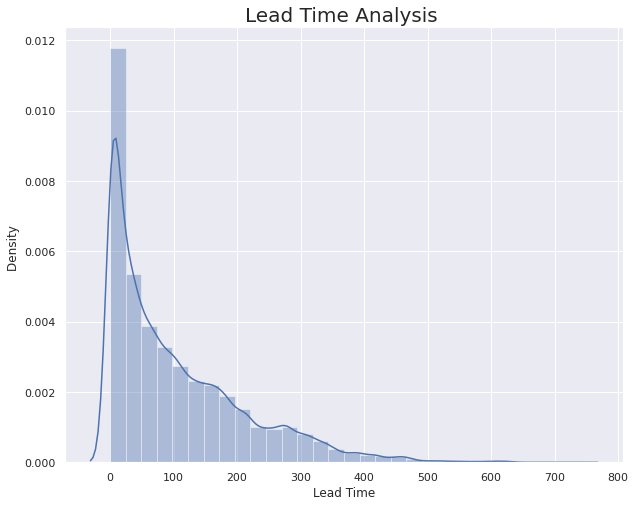

In [112]:
#lead time for booking 

plt.figure(figsize=(10, 8))
ax=sns.distplot(Hotel_book_df['lead_time'],bins=30)
plt.ylabel("Density ", fontsize=12)
plt.xlabel("Lead Time", fontsize=12)
plt.title("Lead Time Analysis ",fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


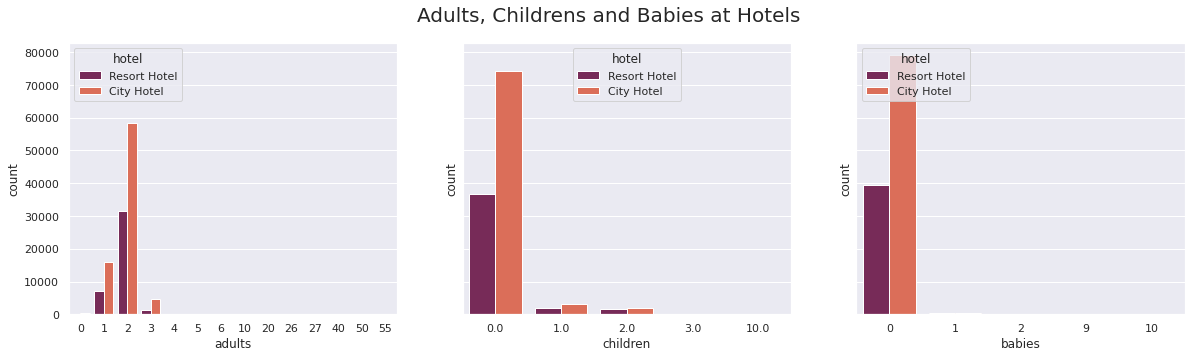

In [113]:
fig,axes=plt.subplots(1,3,figsize=(20,5),sharey=True)

sns.countplot('adults',data=Hotel_book_df,hue='hotel',ax=axes[0],palette='rocket')
sns.countplot('children',data=Hotel_book_df,hue='hotel',ax=axes[1],palette='rocket')
sns.countplot('babies',data=Hotel_book_df,hue='hotel',ax=axes[2],palette='rocket')
plt.suptitle('Adults, Childrens and Babies at Hotels\n',fontsize=20)
plt.show()

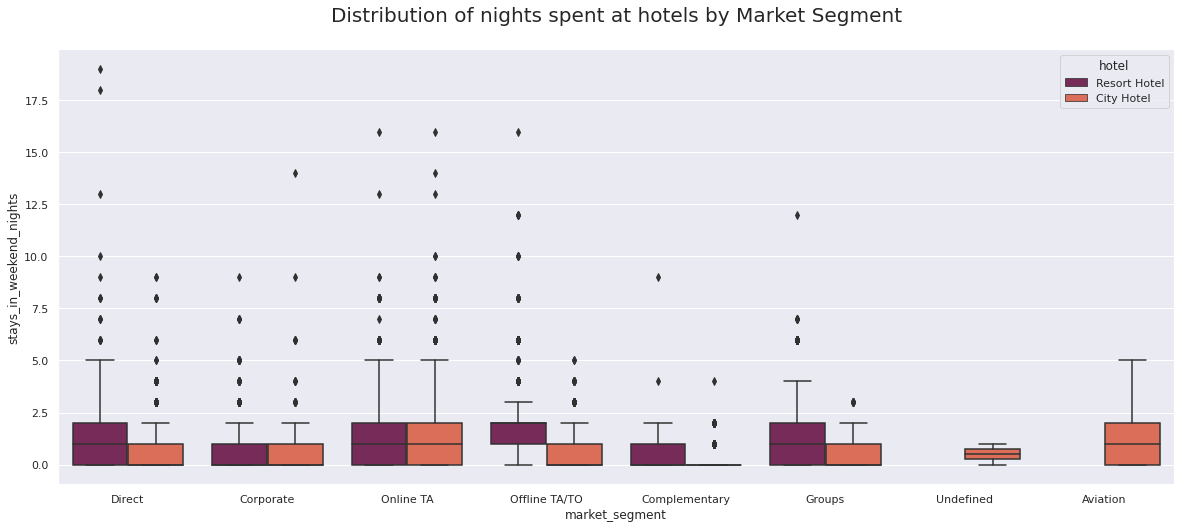

In [114]:
plt.figure(figsize=(20,8))
plt.title('Distribution of nights spent at hotels by Market Segment\n',fontsize=20)
sns.boxplot(x='market_segment',y='stays_in_weekend_nights',data=Hotel_book_df, hue='hotel',palette='rocket')
plt.xlabel('market_segment')
plt.ylabel('stays_in_weekend_nights')
plt.show()

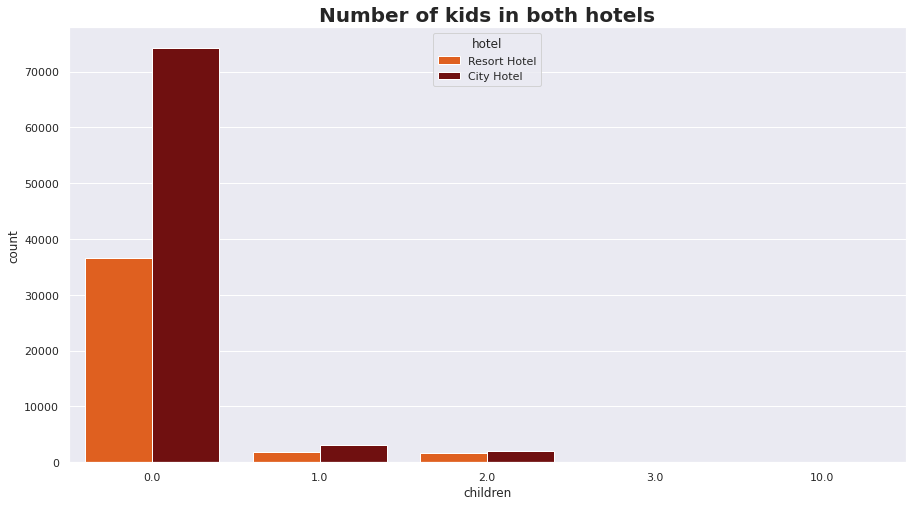

In [115]:
plt.figure(figsize=(15, 8))
sns.countplot(x='children',hue='hotel', data=Hotel_book_df, palette='gist_heat_r')
plt.title("Number of kids in both hotels",fontweight="bold", size=20)
plt.show()

 Deposits - Deposit Type & variaiton by type of customers

Deposits - Deposit Type

In [116]:
 deposit_types = Hotel_book_df.deposit_type.value_counts()
deposit_types

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Text(0.5, 0, 'Deposit type')

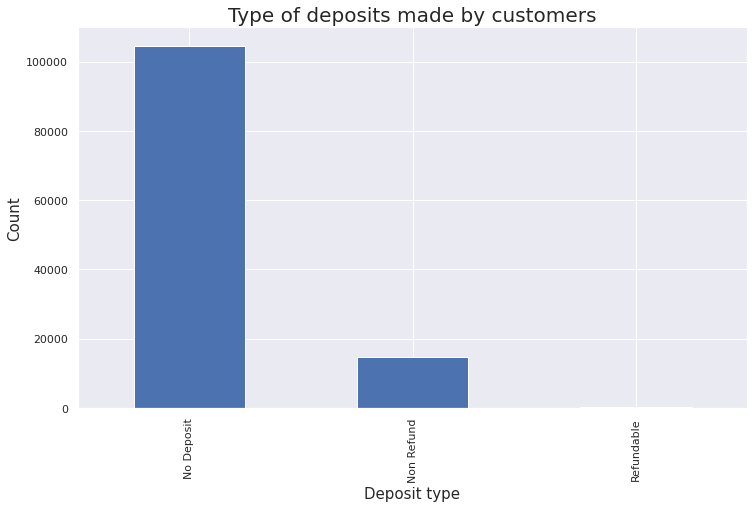

In [117]:
plt.figure(figsize=(12,7))
deposit_types.plot(kind='bar')
plt.title('Type of deposits made by customers',fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Deposit type',fontsize=15)

Conclusion - Most customers prefer to book a no deposit compared to Non Refund and Refundable. But comparing Non Refund and Refundable, customer preferred Non Refund.

# Deposits - Variation by type of customers

In [118]:
deposittype_customertype_relation = Hotel_book_df.groupby(["deposit_type"])["customer_type"].value_counts()
deposittype_customertype_relation

deposit_type  customer_type  
No Deposit    Transient          76684
              Transient-Party    23858
              Contract            3530
              Group                569
Non Refund    Transient          12909
              Transient-Party     1134
              Contract             544
Refundable    Transient-Party      132
              Transient             20
              Group                  8
              Contract               2
Name: customer_type, dtype: int64

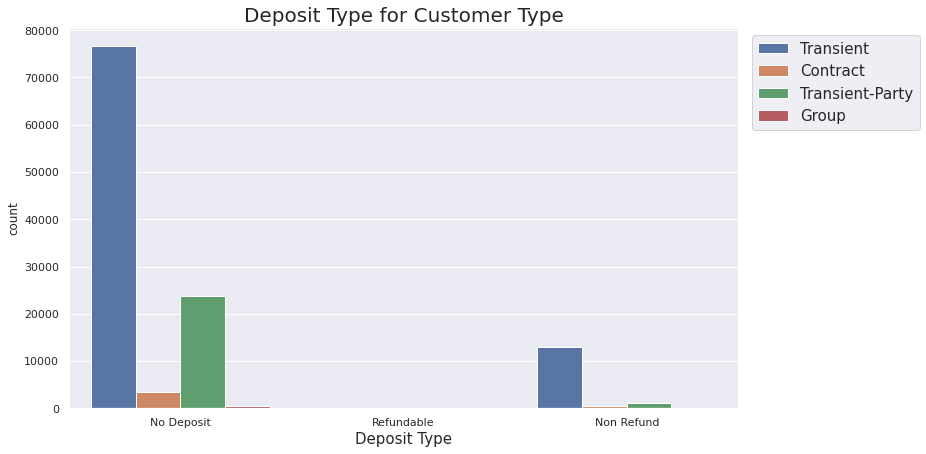

In [119]:
plt.figure(figsize=(12,7))
sns.countplot(data=Hotel_book_df,x='deposit_type',hue='customer_type')
plt.title('Deposit Type for Customer Type',fontsize=20)
plt.xlabel('Deposit Type',fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1),fontsize=15)

Conclusion - Most customer type prefer booking no deposit type. Very less customers booked refundable one. There are no group type customers booked Non-Refund deposit type

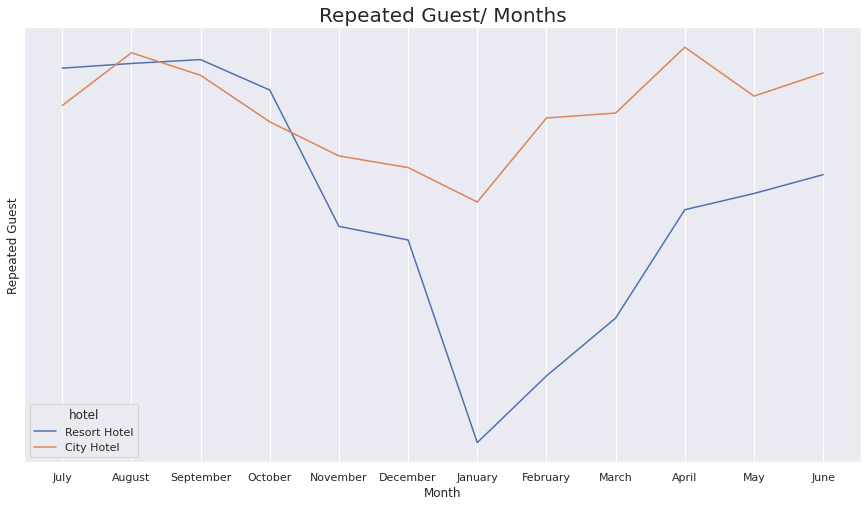

In [120]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = "arrival_date_month", y="is_repeated_guest", hue="hotel", data=Hotel_book_df, ci=None).set_title('Repeated Guest/ Months', fontsize=20)
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Repeated Guest', fontsize=12)
plt.show()


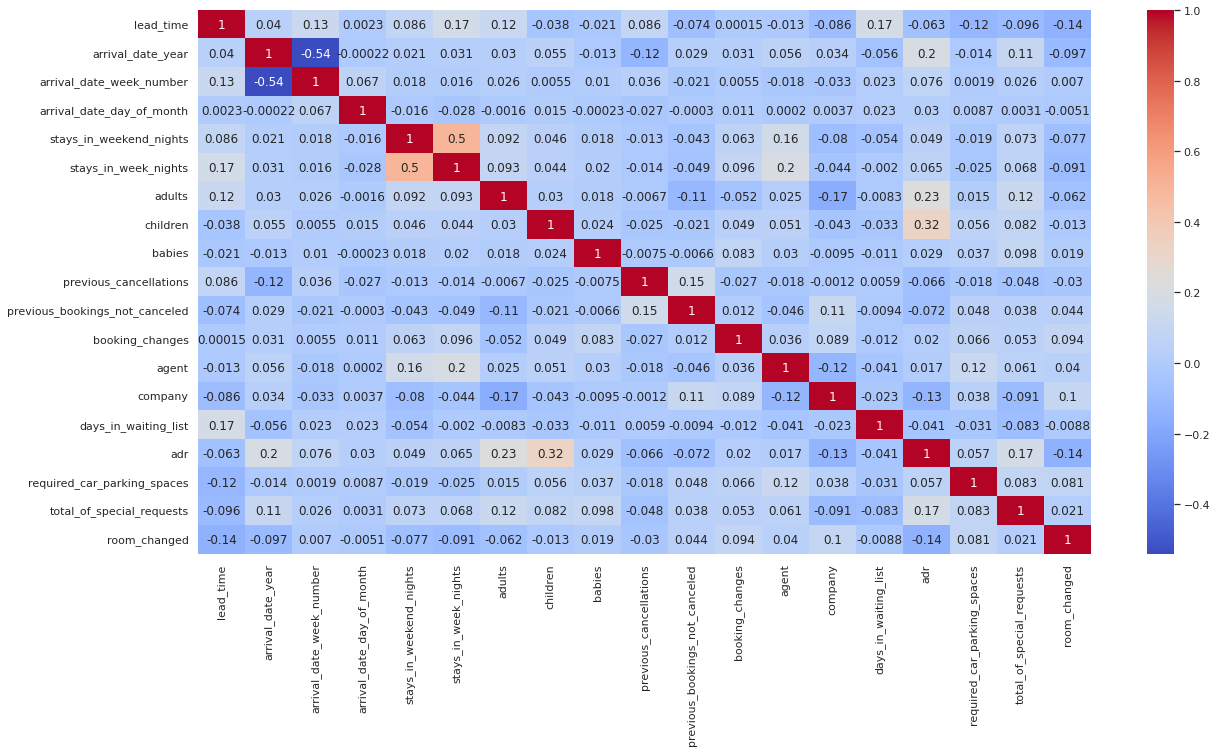

In [121]:
plt.figure(figsize=(20,10))
c=Hotel_book_df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)

Waiting Days - Cancellation WRT Deposit Type

Conclusion - No deposit type cancellations and non cancellations are nearly equal with 0-3 waiting days. For Refundable there are more noncancellation even at the waiting days of 10-13 . For Non refund there are more cancellations for waiting days upto 7-10.